<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [31]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [32]:
sat_score_pd = pd.read_csv('./sat_scores.csv')

print sat_score_pd.head()
print sat_score_pd.info()

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB
None


In [33]:
print sat_score_pd.describe()

            Rate      Verbal        Math
count  52.000000   52.000000   52.000000
mean   37.153846  532.019231  531.500000
std    27.301788   33.236225   36.014975
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  504.000000
50%    33.500000  526.500000  521.000000
75%    63.500000  562.000000  555.750000
max    82.000000  593.000000  603.000000


In [34]:
sat_score_dict = sat_score_pd.to_dict()
print sat_score_dict

{'Math': {0: 510, 1: 513, 2: 515, 3: 505, 4: 516, 5: 499, 6: 499, 7: 506, 8: 500, 9: 501, 10: 499, 11: 510, 12: 499, 13: 489, 14: 501, 15: 488, 16: 474, 17: 526, 18: 499, 19: 527, 20: 499, 21: 515, 22: 510, 23: 517, 24: 525, 25: 515, 26: 542, 27: 439, 28: 539, 29: 512, 30: 542, 31: 553, 32: 542, 33: 589, 34: 550, 35: 545, 36: 572, 37: 589, 38: 580, 39: 554, 40: 568, 41: 561, 42: 577, 43: 562, 44: 596, 45: 550, 46: 570, 47: 603, 48: 582, 49: 599, 50: 551, 51: 514}, 'State': {0: 'CT', 1: 'NJ', 2: 'MA', 3: 'NY', 4: 'NH', 5: 'RI', 6: 'PA', 7: 'VT', 8: 'ME', 9: 'VA', 10: 'DE', 11: 'MD', 12: 'NC', 13: 'GA', 14: 'IN', 15: 'SC', 16: 'DC', 17: 'OR', 18: 'FL', 19: 'WA', 20: 'TX', 21: 'HI', 22: 'AK', 23: 'CA', 24: 'AZ', 25: 'NV', 26: 'CO', 27: 'OH', 28: 'MT', 29: 'WV', 30: 'ID', 31: 'TN', 32: 'NM', 33: 'IL', 34: 'KY', 35: 'WY', 36: 'MI', 37: 'MN', 38: 'KS', 39: 'AL', 40: 'NE', 41: 'OK', 42: 'MO', 43: 'LA', 44: 'WI', 45: 'AR', 46: 'UT', 47: 'IA', 48: 'SD', 49: 'ND', 50: 'MS', 51: 'All'}, 'Rate': {

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [35]:
sat_score_pd_from_dict = pd.DataFrame.from_dict(sat_score_dict)

print sat_score_pd_from_dict.dtypes

sat_score_pd = pd.read_csv('./sat_scores.csv')

print sat_score_pd.dtypes

Math       int64
Rate       int64
State     object
Verbal     int64
dtype: object
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [36]:
sat_score_pd = pd.read_csv('./sat_scores.csv')
print sat_score_pd.head(10)
print sat_score_pd.tail()
print sat_score_pd.shape

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501
   State  Rate  Verbal  Math
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551
51   All    45     506   514
(52, 4)


In [37]:
sat_score_pd['State'].unique()

array(['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE',
       'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI',
       'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM',
       'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA',
       'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], dtype=object)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [38]:
#State: These are the States in USA. 
#       The datatype for values in this column are strings.

#Rate: These are the participation rates of students for each State. 
#      The datatype for values in this column are integers.

#Verbal: These values are the scores of students in the Verbal section of the SAT 
#        in each State. 
#        The datatype for values in this column are integers.

#Math: These values are the scores of students in the Math section of the SAT 
#      in each State. 
#      The datatype for values in this column are integers.

# The shape of the entire data set is 52 rows by 4 columns.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [39]:
import seaborn as sns

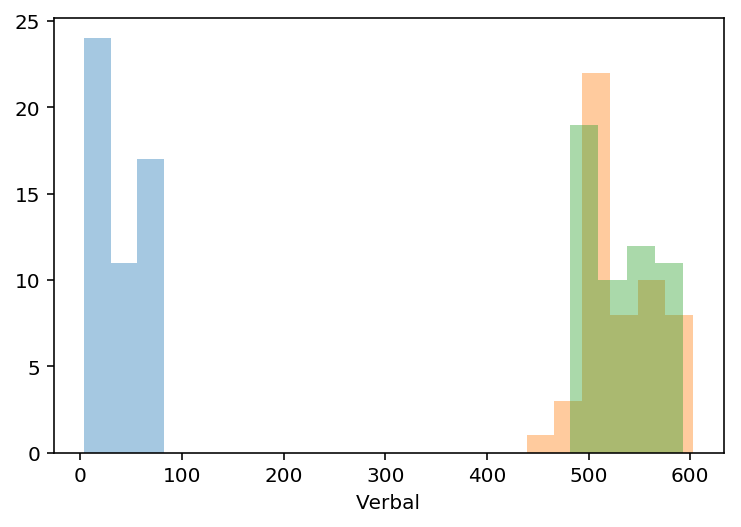

In [40]:
rate_plot = sns.distplot(sat_score_pd['Rate'], kde=False)
math_plot = sns.distplot(sat_score_pd['Math'], kde=False)
verbal_plot = sns.distplot(sat_score_pd['Verbal'], kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

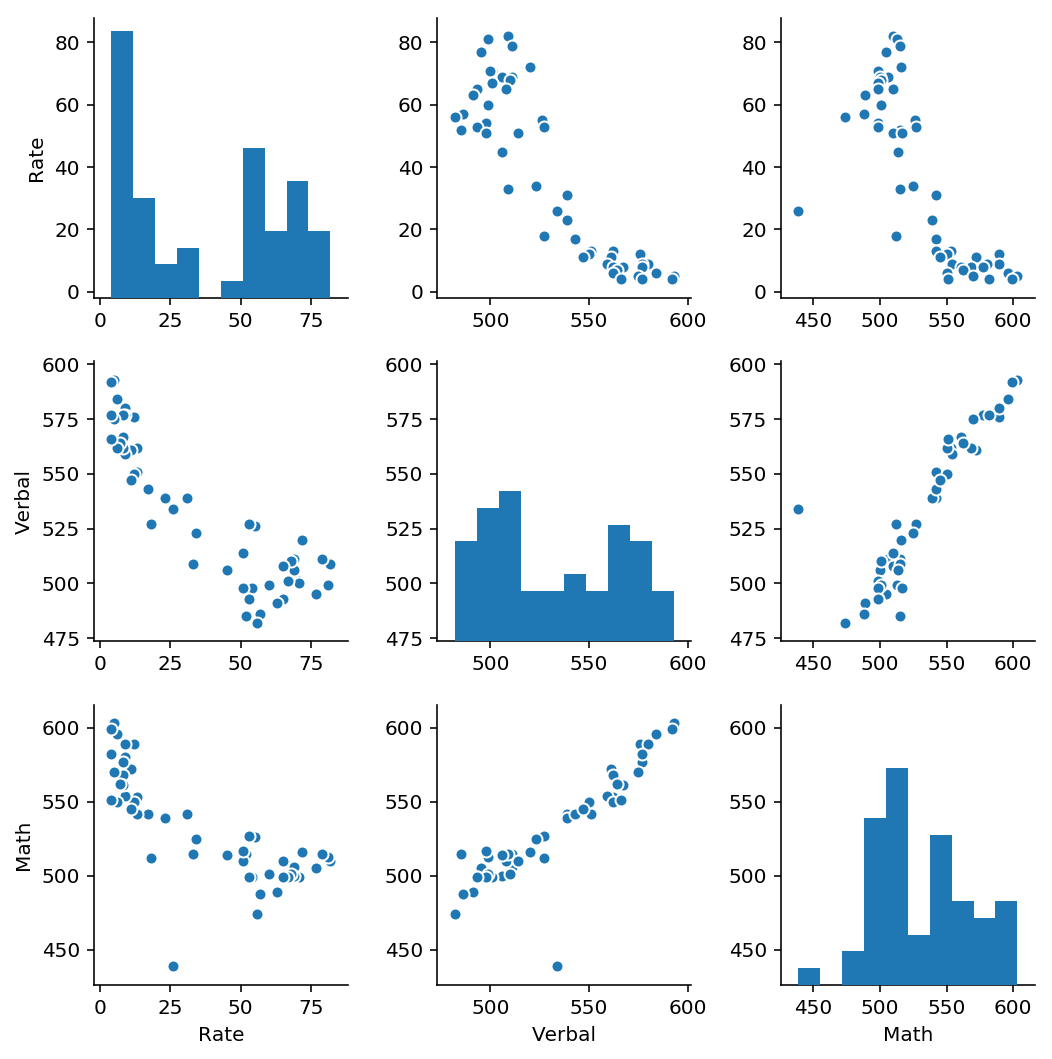

In [41]:
sns.pairplot(sat_score_pd)

In [42]:
'''The marginal distributions are shown as histograms while the joint 
distributions are scatter plots. Note that the scatter plots above the histograms
are the same as the scatter plots below the histograms except that their axes are
inverted.

The scatter plots show the relationship between the verbal scores, math scores 
and rate of participation.

'''

'The marginal distributions are shown as histograms while the joint \ndistributions are scatter plots. Note that the scatter plots above the histograms\nare the same as the scatter plots below the histograms except that their axes are\ninverted.\n\nThe scatter plots show the relationship between the verbal scores, math scores \nand rate of participation.\n\n'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

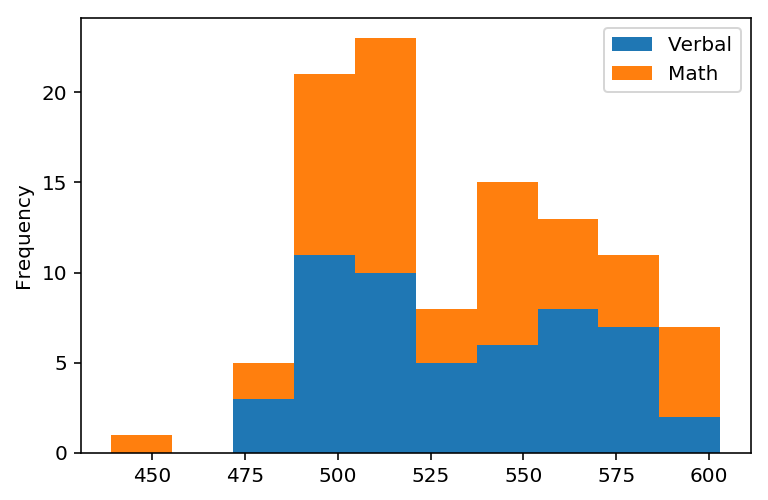

In [43]:
sat_score_pd[['Verbal','Math']].plot.hist(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

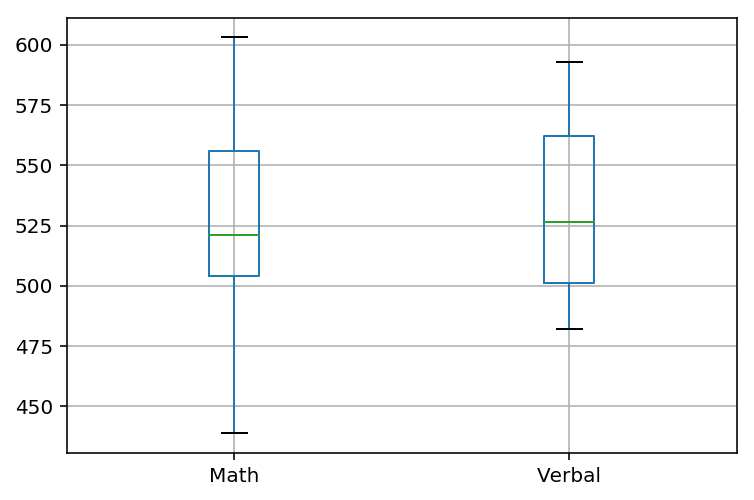

In [44]:
sat_score_pd.boxplot(column=['Math', 'Verbal'])

# Plotting rate will result in the scale of the chart becoming larger as the
# values for Rate are much lower than the other 2 columns.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [45]:
sat_score_numeric = sat_score_pd.drop('State', 1)


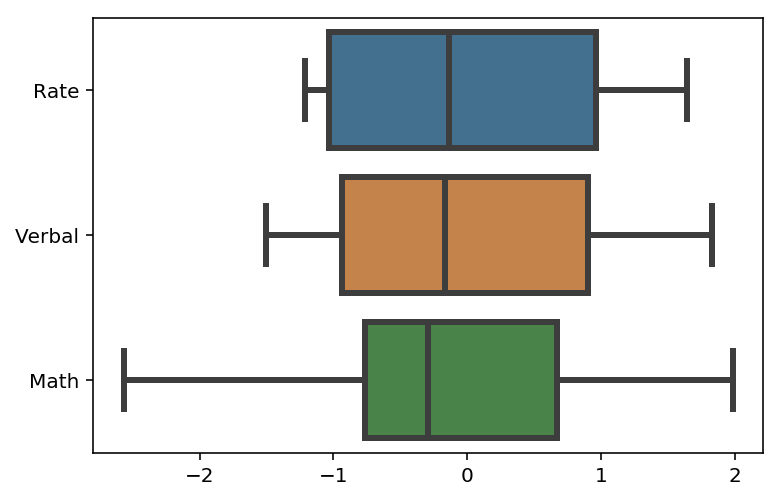

In [46]:
total_stand = (sat_score_numeric - sat_score_numeric.mean())/sat_score_numeric.std()

# fig = plt.figure(figsize=(15,7))
# ax = fig.gca()

sns.boxplot(data=total_stand, orient='h', fliersize=3, 
                 linewidth=3, notch=False, saturation=0.5)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [47]:
#Finding the mean verbal score and comparing it with the verbal scores of all 
#states to determine which states have above-average verbal scores.

sat_score_pd.head()

verbal_mean = sat_score_pd['Verbal'].mean()

print verbal_mean

state_verbal_pd = sat_score_pd[sat_score_pd['Verbal'] > verbal_mean]

print state_verbal_pd 
print len(state_verbal_pd) # This sets out the number of states that did better.
print state_verbal_pd['State'].nunique()


532.019230769
   State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551
24
24


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [48]:
# This is the median verbal score.

verbal_score_median = sat_score_pd['Verbal'].median()
print verbal_score_median 


526.5


In [49]:
# These are teh states that have verbal scores higher than the median verbal score.

state_median_score_pd = sat_score_pd[sat_score_pd['Verbal'] > verbal_score_median]
print state_median_score_pd


   State  Rate  Verbal  Math
19    WA    53     527   527
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551


In [50]:
print len(state_median_score_pd)
print state_median_score_pd['State'].nunique()


26
26


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [51]:
sat_score_pd['Verbal - Math'] = sat_score_pd['Verbal'] - sat_score_pd['Math']

print sat_score_pd

   State  Rate  Verbal  Math  Verbal - Math
0     CT    82     509   510             -1
1     NJ    81     499   513            -14
2     MA    79     511   515             -4
3     NY    77     495   505            -10
4     NH    72     520   516              4
5     RI    71     501   499              2
6     PA    71     500   499              1
7     VT    69     511   506              5
8     ME    69     506   500              6
9     VA    68     510   501              9
10    DE    67     501   499              2
11    MD    65     508   510             -2
12    NC    65     493   499             -6
13    GA    63     491   489              2
14    IN    60     499   501             -2
15    SC    57     486   488             -2
16    DC    56     482   474              8
17    OR    55     526   526              0
18    FL    54     498   499             -1
19    WA    53     527   527              0
20    TX    53     493   499             -6
21    HI    52     485   515    

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [59]:
top_ten_verbal = sat_score_pd.sort_values(by='Verbal - Math', ascending=False).iloc[0:10]
print top_ten_verbal


   State  Rate  Verbal  Math  Verbal - Math
27    OH    26     534   439             95
50    MS     4     566   551             15
29    WV    18     527   512             15
45    AR     6     562   550             12
32    NM    13     551   542              9
31    TN    13     562   553              9
9     VA    68     510   501              9
16    DC    56     482   474              8
8     ME    69     506   500              6
41    OK     8     567   561              6


In [58]:
top_10_math = sat_score_pd.sort_values(by='Verbal - Math', ascending=True).iloc[0:10]
print top_10_math

   State  Rate  Verbal  Math  Verbal - Math
21    HI    52     485   515            -30
23    CA    51     498   517            -19
1     NJ    81     499   513            -14
33    IL    12     576   589            -13
44    WI     6     584   596            -12
36    MI    11     561   572            -11
3     NY    77     495   505            -10
47    IA     5     593   603            -10
37    MN     9     580   589             -9
51   All    45     506   514             -8


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [60]:
sat_score_pd.corr()
# plt.matshow(sat_score_pd.corr())

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal - Math,-0.101412,0.052600,-0.388219,1.000000


In [ ]:
# States with students who have higher verbal scores tend to have higher math
# scores as well. This can be seen from the high positive correlationship between
# math and verbal scores.

# There is also a strong negative correlationship between participation rate and
# math and verbal scores. States with lower participation rate seem to have higher
# scoring students.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [61]:
sat_score_pd.describe()

,Rate,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [62]:
sat_score_pd.cov()


,Rate,Verbal,Math,Verbal - Math
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Verbal - Math,-43.552036,27.499623,-219.931373,247.430995


In [63]:
# Describe how the covariance matrix is different from the correlation matrix:

# Correlation (the Pearson correlation coefficient) measures the strength and 
# direction of the linear relationship between two variables and can take on any 
# value between -1 and +1. 

# Values close to -1 or +1 indicate a strong and linear relationship between the 
# two variables while values close to 0 indicate a weak and/or nonlinear relationship 

# Covariance is a generalization of correlation that measures how two variables 
# change together. However, it is not adjusted for individual variances like 
# correlation.


In [64]:
# What is the process to convert the covariance into the correlation:

# Correlation between 2 values (x and y) is: 

# (covariance between x and y) /  
# (square root of variance of x multipled by the variance of y)


In [65]:
# Why is correlation preferred:

# Both covariance and correlation indicate whether variables are positively or 
# inversely related. But correlation tells you the degree to which the variables 
# tend to move together.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [68]:
drug_use_pd = pd.read_csv('./drug-use-by-age.csv')

print drug_use_pd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [69]:
print drug_use_pd.isnull().sum()


age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64


In [70]:
print drug_use_pd.head()

  age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0               -        ...                    0.1                24.5   
1             3.0        ...                    0.1                4

In [66]:

# There are no null values but data may require cleaning as, on a quick visual 
# inspection, there are columns that have '-' as value instead of an
# integer or float. It is likely these represent 0 but have been recorded as
# '-' instead.

# Additionally, for the 'frequency' column of certain drugs the datatype is 
# reflected as 'object' while others appear to have floats as their datatype. 
# The expected datatype for values in these columns is 'float'. 

#Further investigation is required on these values. It could be that the 
#presence of the '-' are causing the datatype to be read as objects instead of 
#floats.  


In [78]:
# drug_use_pd.loc[:,['cocaine-frequency', 'crack-frequency', 
#                    'heroin-frequency', 'inhalant-frequency', 
#                   'meth-frequency','oxycontin-frequency']].replace('-',0.0, inplace=True)


drug_use_pd['cocaine-frequency'].replace('-',0.0, inplace=True)
drug_use_pd['crack-frequency'].replace('-',0.0, inplace=True)
drug_use_pd['heroin-frequency'].replace('-',0.0,inplace=True)
drug_use_pd['inhalant-frequency'].replace('-',0.0,inplace=True)
drug_use_pd['meth-frequency'].replace('-',0.0,inplace=True)
drug_use_pd['oxycontin-frequency'].replace('-',0.0,inplace=True)

In [80]:
# Floating all the 0s.
drug_use_pd['cocaine-frequency'] = drug_use_pd['cocaine-frequency'].map(lambda x: float(x))
drug_use_pd['crack-frequency'] = drug_use_pd['crack-frequency'].map(lambda x: float(x))
drug_use_pd['heroin-frequency'] = drug_use_pd['heroin-frequency'].map(lambda x: float(x))
drug_use_pd['oxycontin-frequency'] = drug_use_pd['oxycontin-frequency'].map(lambda x: float(x))
drug_use_pd['inhalant-frequency'] = drug_use_pd['inhalant-frequency'].map(lambda x: float(x))
drug_use_pd['meth-frequency'] = drug_use_pd['meth-frequency'].map(lambda x: float(x))
print drug_use_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [378]:
print drug_use_pd

      age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                3.0            1.1   
1      13  2757          8.5                6.0            3.4   
2      14  2792         18.1                5.0            8.7   
3      15  2956         29.2                6.0           14.5   
4      16  3058         40.1               10.0           22.5   
5      17  3038         49.3               13.0           28.0   
6      18  2469         58.7               24.0           33.7   
7      19  2223         64.6               36.0           33.4   
8      20  2271         69.7               48.0           34.0   
9      21  2354         83.2               52.0           33.0   
10  22-23  4707         84.2               52.0           28.4   
11  24-25  4591         83.1               52.0           24.9   
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5               52.0           16.4   
14  35-49 

16           0.0                15.0  


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [379]:
pd.set_option('max_columns', 30)
drug_use_pd.head(20)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,0.0,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [81]:
inhalant_use = drug_use_pd.iloc[:,[0,14,15]]
print inhalant_use


      age  inhalant-use  inhalant-frequency
0      12           1.6                19.0
1      13           2.5                12.0
2      14           2.6                 5.0
3      15           2.5                 5.5
4      16           3.0                 3.0
5      17           2.0                 4.0
6      18           1.8                 4.0
7      19           1.4                 3.0
8      20           1.5                 4.0
9      21           1.4                 2.0
10  22-23           1.0                 4.0
11  24-25           0.8                 2.0
12  26-29           0.6                 4.0
13  30-34           0.4                 3.5
14  35-49           0.3                10.0
15  50-64           0.2                13.5
16    65+           0.0                 0.0


In [82]:
correlation_table = drug_use_pd.corr()
print correlation_table['inhalant-use']

n                         -0.368395
alcohol-use               -0.648248
alcohol-frequency         -0.864153
marijuana-use              0.127336
marijuana-frequency       -0.577792
cocaine-use               -0.214609
cocaine-frequency         -0.384500
crack-use                 -0.543499
crack-frequency           -0.456834
heroin-use                -0.215961
heroin-frequency          -0.494707
hallucinogen-use           0.173030
hallucinogen-frequency    -0.137576
inhalant-use               1.000000
inhalant-frequency         0.036979
pain-releiver-use          0.092045
pain-releiver-frequency   -0.342676
oxycontin-use              0.110492
oxycontin-frequency       -0.101930
tranquilizer-use          -0.103745
tranquilizer-frequency     0.158140
stimulant-use              0.108381
stimulant-frequency       -0.419717
meth-use                  -0.059903
meth-frequency            -0.240258
sedative-use               0.110611
sedative-frequency        -0.293189
Name: inhalant-use, dtype: f

In [381]:
correlation_table.columns

Index([u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

In [382]:
illegal_drugs_use = correlation_table.drop(['alcohol-use','alcohol-frequency','marijuana-use','marijuana-frequency', 'cocaine-frequency','crack-frequency','heroin-frequency','hallucinogen-frequency','inhalant-frequency','pain-releiver-frequency','oxycontin-frequency','tranquilizer-frequency','stimulant-frequency','meth-frequency','sedative-frequency'],1)

In [383]:
illegal_drugs_use.corr()

,n,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
n,1.000000,-0.257871,0.122628,-0.298010,-0.439738,-0.640447,-0.349998,-0.384682,-0.286455,-0.411266,-0.319642,-0.317485
cocaine-use,-0.257871,1.000000,0.901639,0.984952,0.953895,-0.046451,0.974198,0.968788,0.990562,0.972420,0.985083,0.849576
crack-use,0.122628,0.901639,1.000000,0.873648,0.753325,-0.412045,0.812345,0.797444,0.876190,0.789183,0.856619,0.723042
heroin-use,-0.298010,0.984952,0.873648,1.000000,0.924004,-0.046109,0.949315,0.944346,0.964662,0.952766,0.967874,0.796476
hallucinogen-use,-0.439738,0.953895,0.753325,0.924004,1.000000,0.223068,0.989213,0.992131,0.971226,0.994173,0.967152,0.893608
inhalant-use,-0.640447,-0.046451,-0.412045,-0.046109,0.223068,1.000000,0.159706,0.175998,0.033680,0.175993,0.066800,0.250556
pain-releiver-use,-0.349998,0.974198,0.812345,0.949315,0.989213,0.159706,1.000000,0.997756,0.990772,0.995941,0.989176,0.915958
oxycontin-use,-0.384682,0.968788,0.797444,0.944346,0.992131,0.175998,0.997756,1.000000,0.987617,0.997262,0.987803,0.913916
tranquilizer-use,-0.286455,0.990562,0.876190,0.964662,0.971226,0.033680,0.990772,0.987617,1.000000,0.984703,0.995246,0.905634
stimulant-use,-0.411266,0.972420,0.789183,0.952766,0.994173,0.175993,0.995941,0.997262,0.984703,1.000000,0.986399,0.896698


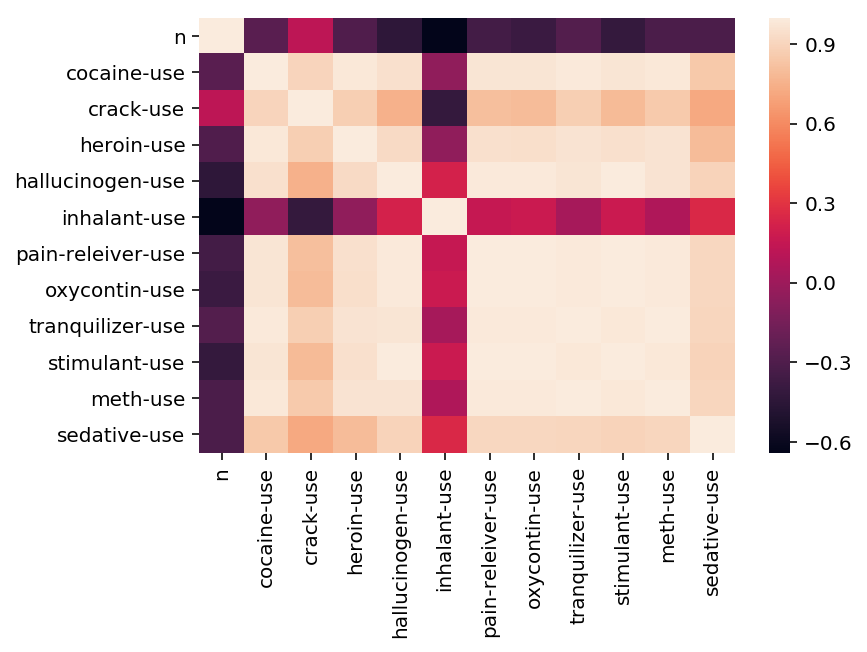

In [384]:
sns.heatmap(illegal_drugs_use.corr())

In [83]:

# Response:

# This is a wide dataset with 28 columns and 17 rows. There is a strong 
# positive correlation between most kinds of drug uses except for inhalents.
# It also appears that abuse of inhalants does not exceed 3% of samples in each
# age group. People don't seem  to like inhalants as much as other drugs.


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [84]:
# Null hypothesis: 

# mean use of drugs by participants below 18 ('Minors') = mean use of drugs by 
# participants above 17 ('Adults').

# Deliverables:
# 1) mean use of drugs (except alcohol and marijuana) by Minors;
# 2) mean use of drugs (except alcohol and marijuana) by Adults.


In [85]:
# Creating a new dataframe that captures the total amount of drugs consumed by
# each age group.

drug_use_volume_pd = drug_use_pd[['age','n']]

drug_use_volume_pd.loc[:,'cocaine_consumption'] = drug_use_pd['n'] * (drug_use_pd['cocaine-use'] / 100) * drug_use_pd['cocaine-frequency']
drug_use_volume_pd.loc[:,'crack_consumption'] = drug_use_pd['n'] * (drug_use_pd['crack-use'] / 100) * drug_use_pd['crack-frequency']
drug_use_volume_pd.loc[:,'heroin_consumption'] = drug_use_pd['n'] * (drug_use_pd['heroin-use'] / 100) * drug_use_pd['heroin-frequency']
drug_use_volume_pd.loc[:,'hallucinogen_consumption'] = drug_use_pd['n'] * (drug_use_pd['hallucinogen-use'] / 100) * drug_use_pd['hallucinogen-frequency']
drug_use_volume_pd.loc[:,'inhalant_consumption'] = drug_use_pd['n'] * (drug_use_pd['inhalant-use'] / 100) * drug_use_pd['inhalant-frequency']
drug_use_volume_pd.loc[:,'pain-reliever_consumption'] = drug_use_pd['n'] * (drug_use_pd['pain-releiver-use'] / 100) * drug_use_pd['pain-releiver-frequency']
drug_use_volume_pd.loc[:,'oxycontin_consumption'] = drug_use_pd['n'] * (drug_use_pd['oxycontin-use'] / 100) * drug_use_pd['oxycontin-frequency']
drug_use_volume_pd.loc[:,'tranquilizer_consumption'] = drug_use_pd['n'] * (drug_use_pd['tranquilizer-use'] / 100) * drug_use_pd['tranquilizer-frequency']
drug_use_volume_pd.loc[:,'stimulant_consumption'] = drug_use_pd['n'] * (drug_use_pd['stimulant-use'] / 100) * drug_use_pd['stimulant-frequency']
drug_use_volume_pd.loc[:,'meth_consumption'] = drug_use_pd['n'] * (drug_use_pd['meth-use'] / 100) * drug_use_pd['meth-frequency']
drug_use_volume_pd.loc[:,'sedative_consumption'] = drug_use_pd['n'] * (drug_use_pd['sedative-use'] / 100) * drug_use_pd['sedative-frequency']
print drug_use_volume_pd


C:\Users\OJ\Anaconda2\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\OJ\Anaconda2\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


      age     n  cocaine_consumption  crack_consumption  heroin_consumption  \
0      12  2798              13.9900              0.000             99.3290   
1      13  2757               2.7570              0.000              0.0000   
2      14  2792              15.3560              0.000              5.5840   
3      15  2956              59.1200             28.082              5.9120   
4      16  3058             214.0600              0.000            203.3570   
5      17  3038             303.8000             63.798            194.4320   
6      18  2469             395.0400             98.760            454.2960   
7      19  2223             501.2865             22.230           2000.7000   
8      20  2271             890.2320             68.130            919.7550   
9      21  2354             564.9600            200.090            423.7200   
10  22-23  4707            1059.0750            117.675           2977.1775   
11  24-25  4591            1101.8400            137.

In [91]:
drug_use_volume_pd = drug_use_volume_pd.rename(columns={'n':'No. of Samples'})

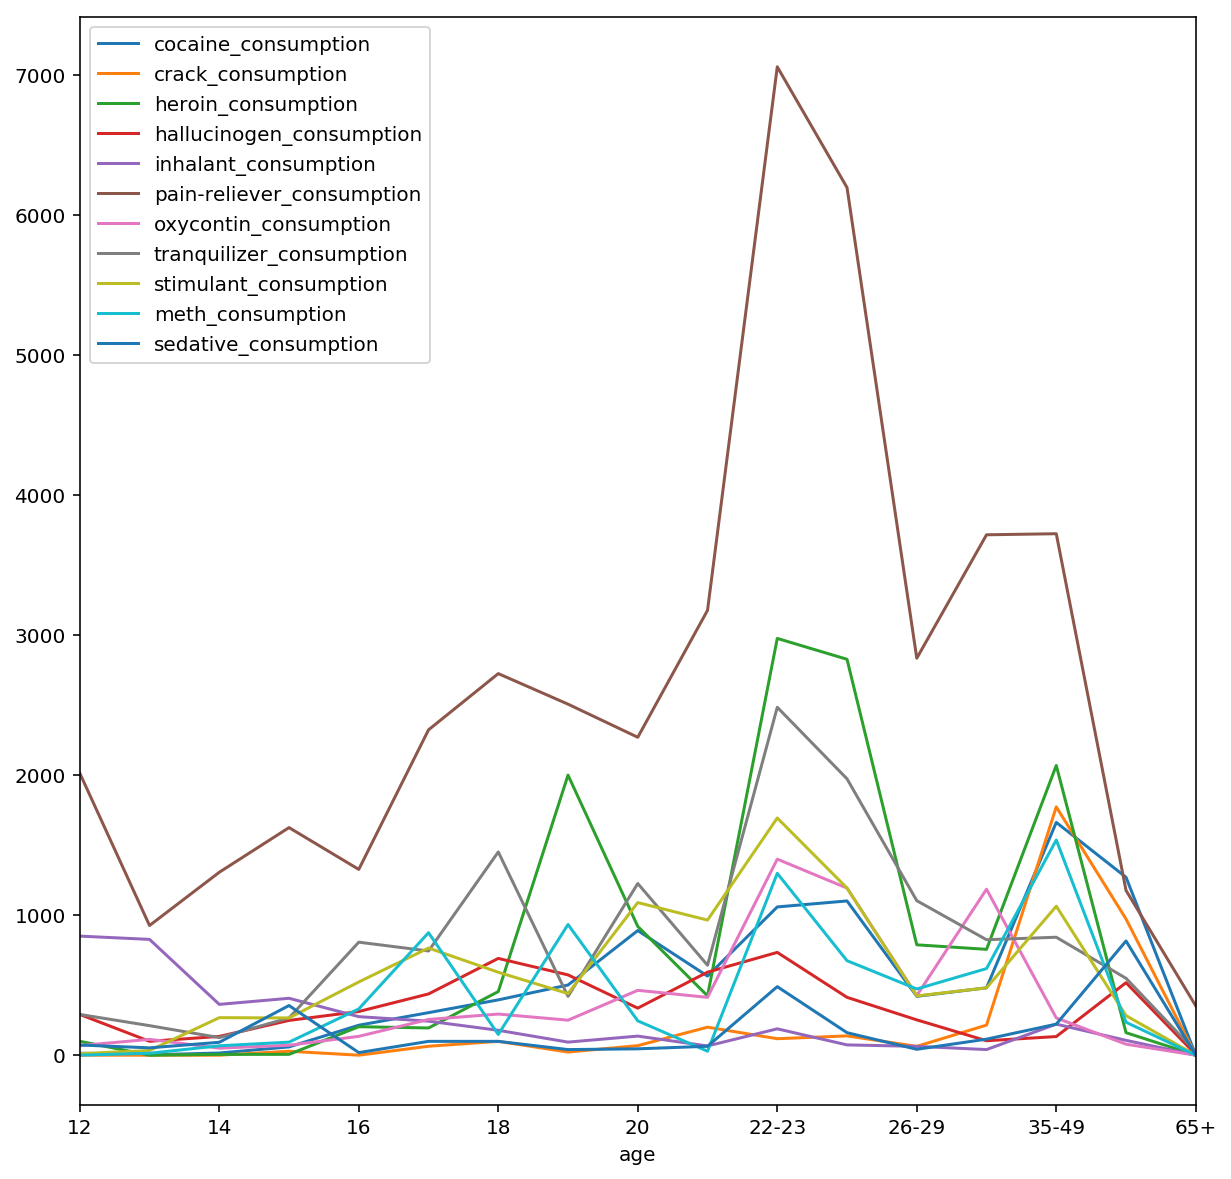

In [93]:
plot_drug_use = drug_use_volume_pd.drop('No. of Samples',1)
plot_drug_use.plot(figsize=(10,10), x='age')

In [94]:
drug_use_volume_pd.corr()

,No. of Samples,cocaine_consumption,crack_consumption,heroin_consumption,hallucinogen_consumption,inhalant_consumption,pain-reliever_consumption,oxycontin_consumption,tranquilizer_consumption,stimulant_consumption,meth_consumption,sedative_consumption
No. of Samples,1.000000,0.760986,0.820903,0.580921,-0.030748,-0.058837,0.497339,0.279343,0.366089,0.495390,0.719833,0.428214
cocaine_consumption,0.760986,1.000000,0.767630,0.691617,0.331560,-0.442656,0.587901,0.446159,0.569031,0.697043,0.672260,0.530527
crack_consumption,0.820903,0.767630,1.000000,0.262305,-0.074574,-0.164194,0.130455,-0.045697,0.033503,0.233124,0.513052,0.464095
heroin_consumption,0.580921,0.691617,0.262305,1.000000,0.391472,-0.354638,0.876390,0.735202,0.754132,0.775209,0.786116,0.169087
hallucinogen_consumption,-0.030748,0.331560,-0.074574,0.391472,1.000000,-0.251540,0.474724,0.311467,0.584498,0.540083,0.227414,0.349308
inhalant_consumption,-0.058837,-0.442656,-0.164194,-0.354638,-0.251540,1.000000,-0.303054,-0.376266,-0.357095,-0.422687,-0.313615,-0.101247
pain-reliever_consumption,0.497339,0.587901,0.130455,0.876390,0.474724,-0.303054,1.000000,0.901544,0.874799,0.842823,0.661197,0.200217
oxycontin_consumption,0.279343,0.446159,-0.045697,0.735202,0.311467,-0.376266,0.901544,1.000000,0.813152,0.717671,0.508033,0.147821
tranquilizer_consumption,0.366089,0.569031,0.033503,0.754132,0.584498,-0.357095,0.874799,0.813152,1.000000,0.848766,0.524840,0.224531
stimulant_consumption,0.495390,0.697043,0.233124,0.775209,0.540083,-0.422687,0.842823,0.717671,0.848766,1.000000,0.661030,0.189669


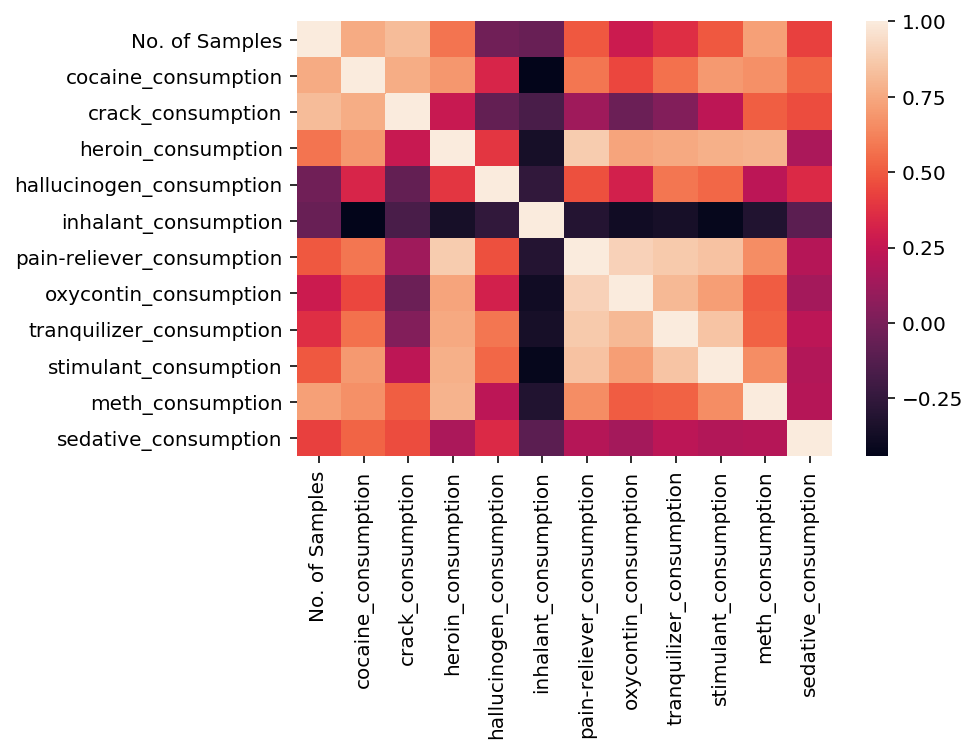

In [95]:
sns.heatmap(drug_use_volume_pd.corr())

In [106]:
# Dataframe tabulating the number of users of each drug in each age group.
drug_users_pd = drug_use_pd[['age','n']]

drug_users_pd.loc[:,'cocaine_users'] = drug_use_pd['n'] * (drug_use_pd['cocaine-use'] / 100) 
drug_users_pd.loc[:,'crack_users'] = drug_use_pd['n'] * (drug_use_pd['crack-use'] / 100) 
drug_users_pd.loc[:,'heroin_users'] = drug_use_pd['n'] * (drug_use_pd['heroin-use'] / 100) 
drug_users_pd.loc[:,'hallucinogen_users'] = drug_use_pd['n'] * (drug_use_pd['hallucinogen-use'] / 100) 
drug_users_pd.loc[:,'inhalant_users'] = drug_use_pd['n'] * (drug_use_pd['inhalant-use'] / 100) 
drug_users_pd.loc[:,'pain-reliever_users'] = drug_use_pd['n'] * (drug_use_pd['pain-releiver-use'] / 100)
drug_users_pd.loc[:,'oxycontin_users'] = drug_use_pd['n'] * (drug_use_pd['oxycontin-use'] / 100) 
drug_users_pd.loc[:,'tranquilizer_users'] = drug_use_pd['n'] * (drug_use_pd['tranquilizer-use'] / 100) 
drug_users_pd.loc[:,'stimulant_users'] = drug_use_pd['n'] * (drug_use_pd['stimulant-use'] / 100) 
drug_users_pd.loc[:,'meth_users'] = drug_use_pd['n'] * (drug_use_pd['meth-use'] / 100) 
drug_users_pd.loc[:,'sedative_users'] = drug_use_pd['n'] * (drug_use_pd['sedative-use'] / 100) 
print drug_users_pd.head()

  age     n  cocaine_users  crack_users  heroin_users  hallucinogen_users  \
0  12  2798          2.798        0.000         2.798               5.596   
1  13  2757          2.757        0.000         0.000              16.542   
2  14  2792          2.792        0.000         2.792              44.672   
3  15  2956         14.780        2.956         5.912              62.076   
4  16  3058         30.580        0.000         3.058             103.972   

   inhalant_users  pain-reliever_users  oxycontin_users  tranquilizer_users  \
0          44.768               55.960            2.798               5.596   
1          68.925               66.168            2.757               8.271   
2          72.592              108.888           11.168              25.128   
3          73.900              162.580           23.648              59.120   
4          91.740              189.596           33.638              73.392   

   stimulant_users  meth_users  sedative_users  
0            

In [103]:
#Calculating mean drug usage for minors
#Calculating the total number of minors who abuse drugs
drug_users_minors = drug_users_pd.iloc[0:6,2:].sum()
drug_users_minors

cocaine_users          114.467
crack_users              5.994
heroin_users            17.598
hallucinogen_users     378.682
inhalant_users         412.685
pain-reliever_users    841.422
oxycontin_users        116.541
tranquilizer_users     277.837
stimulant_users        220.651
meth_users              41.819
sedative_users          47.067
dtype: float64

In [105]:
#Total number of minors who take any kind of drugs.

total_drug_users_minors = drug_users_minors.sum()
total_drug_users_minors

2474.7629999999995

In [109]:
#Amount of drugs consumed by minors
amt_drug_consumed_minors = drug_use_volume_pd.iloc[0:6,2:]
amt_drug_consumed_minors

,cocaine_consumption,crack_consumption,heroin_consumption,hallucinogen_consumption,inhalant_consumption,pain-reliever_consumption,oxycontin_consumption,tranquilizer_consumption,stimulant_consumption,meth_consumption,sedative_consumption
0,13.990,0.000,99.329,290.992,850.592,2014.560,68.551,290.9920,11.192,0.000,72.748
1,2.757,0.000,0.000,99.252,827.100,926.352,113.037,210.9105,33.084,13.785,52.383
2,15.356,0.000,5.584,134.016,362.960,1306.656,50.256,125.6400,268.032,67.008,92.136
3,59.120,28.082,5.912,248.304,406.450,1625.800,70.944,266.0400,266.040,93.114,354.720
4,214.060,0.000,203.357,311.916,275.220,1327.172,134.552,807.3120,522.918,330.264,18.348
5,303.800,63.798,194.432,437.472,243.040,2324.070,255.192,744.3100,765.576,874.944,98.735


In [111]:
#Total amount of drugs consumed by minors

total_amt_drug_consumed_minors = amt_drug_consumed_minors.sum().sum()
total_amt_drug_consumed_minors

22294.2645

In [112]:
# Mean drug consumption for minors.

mean_amt_drug_consumed_minors = total_amt_drug_consumed_minors / total_drug_users_minors
mean_amt_drug_consumed_minors

9.008646282492508

In [118]:
drug_users_adults = drug_users_pd.iloc[6:,2:].sum()
total_drug_users_adults = drug_users_adults.sum()
amt_drugs_consumed_adults = drug_use_volume_pd.iloc[6:,2:]
total_drugs_consumed_adults = amt_drugs_consumed_adults.sum().sum()
mean_drug_consumed_adults = total_drugs_consumed_adults / total_drug_users_adults
mean_drug_consumed_adults

12.152368608724714

In [119]:
amt_drugs_consumed_adults['age'] = drug_use_volume_pd['age'][6:]

amt_drugs_consumed_adults = amt_drugs_consumed_adults.set_index('age')
 

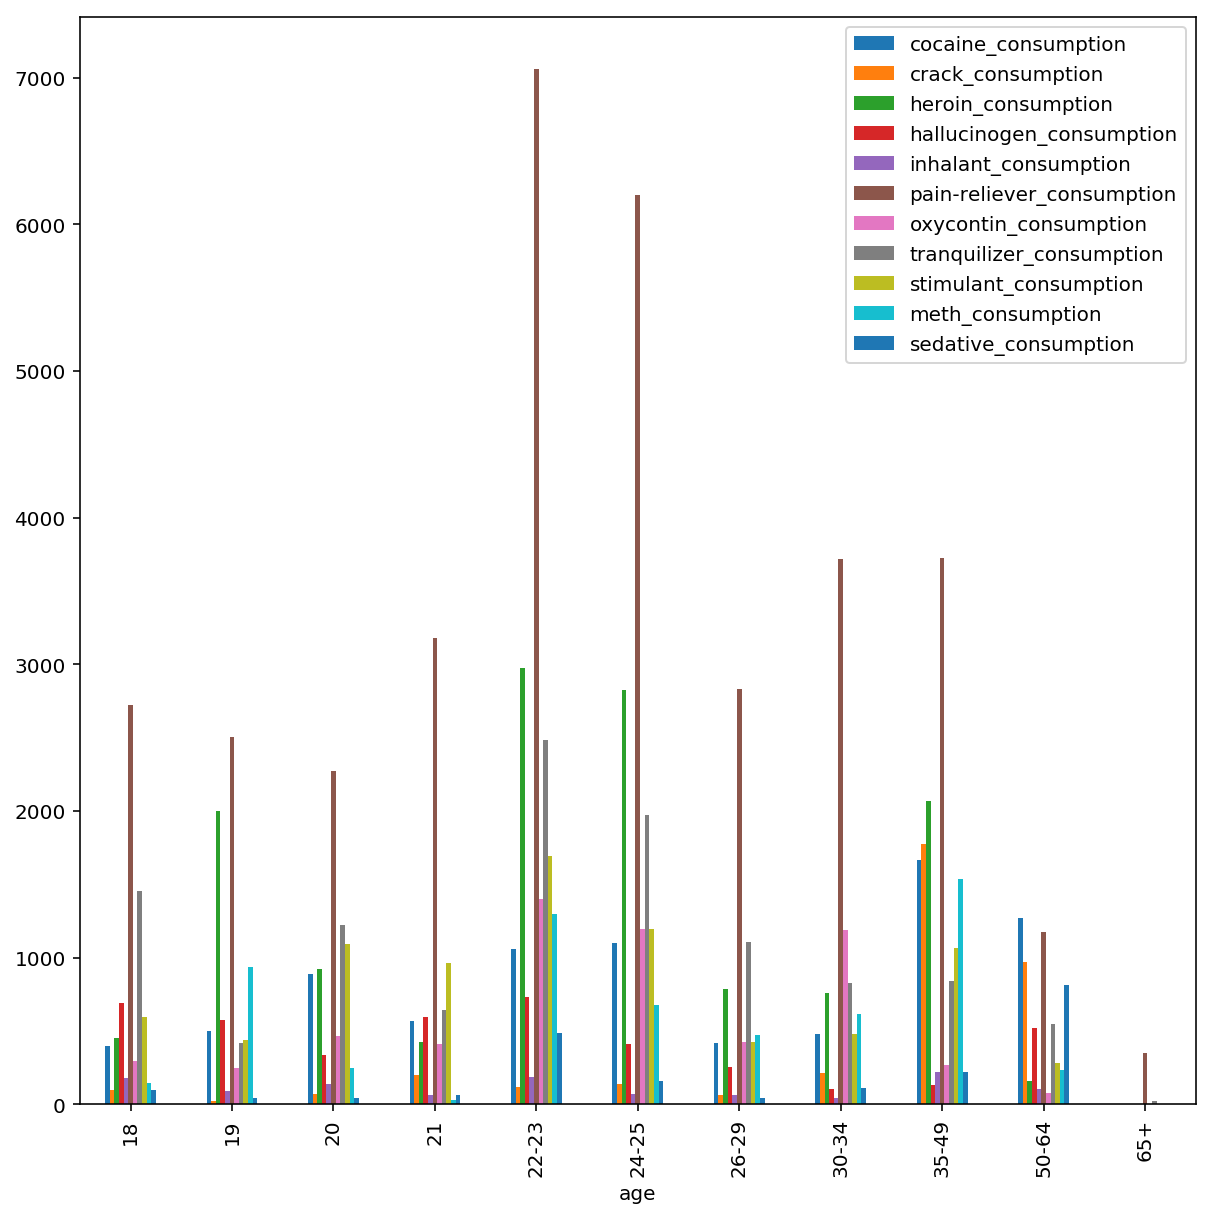

In [120]:
amt_drugs_consumed_adults.plot(kind='bar', figsize=(10,10))

In [121]:
amt_drug_consumed_minors['age'] = drug_use_volume_pd['age'][:6]
amt_drug_consumed_minors = amt_drug_consumed_minors.set_index('age')


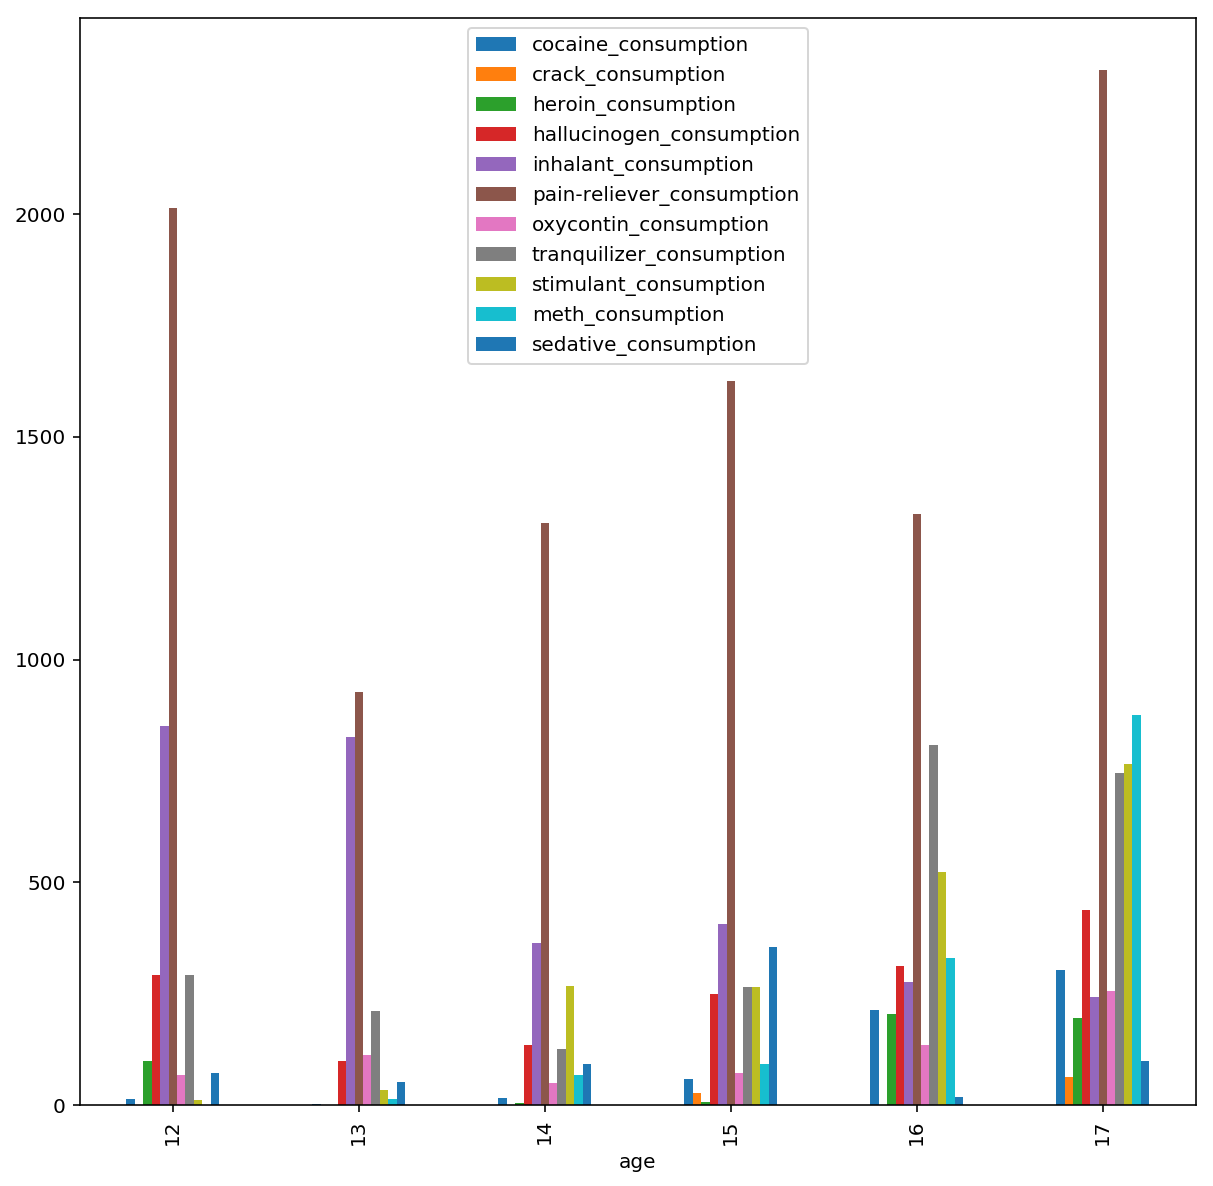

In [122]:
amt_drug_consumed_minors.plot(kind='bar', figsize=(10,10))

In [124]:
#T-test
stats.ttest_ind(amt_drugs_consumed_adults.sum().values, amt_drug_consumed_minors.sum().values)


Ttest_indResult(statistic=2.3785095248596759, pvalue=0.027461676524400298)

**Report**

Conclusion:

As can be seen from the data above, on average, Adults use about 33% more drugs than Minors (12.15 vs 9.01). Since the pvalue is much less than 0.05, the results above is statistically significant and the null hypothesis that Adults and Minors use the same amount of drugs can be rejected.

The increase in drug consumption may be attributed to the fact that Adults generally have more freedom and resources available to them (they go to college at that age and are not retricted by child labor laws) to try different substances as compared to Minors.

Exclusions:

Data collected for alcohol and marijuana use was not included in the analysis as alcohol is legal and marijuana is legal in varying degrees across the United States. 

The widespread use of these substances may be attributed to higher availability and increased security in their usage, factors which are in turn attributable to their legality. The data for use of these substances may therefore skew any comparison with other drugs.

Assumptions:

1) the same quantity of each substance is taken each time any participant takes any drug;

2) there are no overlaps in the drugs described in each column of the table given.

Limitations:

1) A large difference was detected in the number of participants sampled across different age groups;

2) some age groups were lumped together while others were not.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [125]:
sat_score_pd

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


In [126]:
sat_score_pd['Rate']

0     82
1     81
2     79
3     77
4     72
5     71
6     71
7     69
8     69
9     68
10    67
11    65
12    65
13    63
14    60
15    57
16    56
17    55
18    54
19    53
20    53
21    52
22    51
23    51
24    34
25    33
26    31
27    26
28    23
29    18
30    17
31    13
32    13
33    12
34    12
35    11
36    11
37     9
38     9
39     9
40     8
41     8
42     8
43     7
44     6
45     6
46     5
47     5
48     4
49     4
50     4
51    45
Name: Rate, dtype: int64

In [ ]:
# Any value which is more than 2 standard deviations from the mean
# can be considered an outlier.


In [93]:
print np.std(sat_score_pd['Rate'])
print np.mean(sat_score_pd['Rate'])
#plt.boxplot(sat_score_pd['Rate'])

27.0379964945
37.1538461538


In [ ]:
# Based on the definition above, there are no outliers in the 'Rate' column of 
# the dataframe.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [117]:
sat_score_pd.corr(method='spearman')

,Rate,Verbal,Math,Verbal - Math,Absolute Verbal - Math,Percentile,Percentile of Rate Score
Rate,1.000000,-0.833294,-0.813275,-0.014266,-0.223552,1.000000,1.000000
Verbal,-0.833294,1.000000,0.905205,0.060244,0.105576,-0.833294,-0.833294
Math,-0.813275,0.905205,1.000000,-0.239883,0.143793,-0.813275,-0.813275
Verbal - Math,-0.014266,0.060244,-0.239883,1.000000,-0.129288,-0.014266,-0.014266
Absolute Verbal - Math,-0.223552,0.105576,0.143793,-0.129288,1.000000,-0.223552,-0.223552
Percentile,1.000000,-0.833294,-0.813275,-0.014266,-0.223552,1.000000,1.000000
Percentile of Rate Score,1.000000,-0.833294,-0.813275,-0.014266,-0.223552,1.000000,1.000000


In [ ]:
# The Spearman correlation between two variables is equal to the Pearson 
# correlation between the rank values of those two variables; while Pearson's 
# correlation assesses linear relationships, Spearman's correlation assesses 
# monotonic relationships (whether linear or not).

# Intuitively, the Spearman correlation between two variables will be high when 
# observations have a similar (or identical for a correlation of 1) rank 
# (i.e. relative position label of the observations within the variable: 1st, 
# 2nd, 3rd, etc.) between the two variables, and low when observations have a 
# dissimilar (or fully opposed for a correlation of −1) rank between the two 
# variables.

# The Spearman correlation is less sensitive than the Pearson correlation to 
# strong outliers that are in the tails of both samples. That is because 
# Spearman's rho limits the outlier to the value of its rank.

# (see https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)

# My understanding is that for the Spearman correlation, each value in a 
# column is ranked. The Spearman correlation between values of 2 columns is the
# relationship between the ranking of the values in each column. 


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [73]:
#sat_score_pd['Percentile'] = sat_score_pd['Rate'].apply(lambda x: stats.percentileofscore(sat_score_pd['Rate'].sort_values(),x))

In [127]:
sat_score_rate_sorted = sorted(sat_score_pd['Rate'])
sat_score_pd['Percentile of Rate Score'] = sat_score_pd['Rate'].apply(lambda x: stats.percentileofscore(sat_score_rate_sorted, x))

In [128]:
sat_score_pd

,State,Rate,Verbal,Math,Verbal - Math,Percentile of Rate Score
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.076923
2,MA,79,511,515,-4,96.153846
3,NY,77,495,505,-10,94.230769
4,NH,72,520,516,4,92.307692
5,RI,71,501,499,2,89.423077
6,PA,71,500,499,1,89.423077
7,VT,69,511,506,5,85.576923
8,ME,69,506,500,6,85.576923
9,VA,68,510,501,9,82.692308


In [129]:
df_ca = sat_score_pd[sat_score_pd['State'] == 'CA']
df_ca

,State,Rate,Verbal,Math,Verbal - Math,Percentile of Rate Score
23,CA,51,498,517,-19,56.730769


In [ ]:
# How are percentile and Spearman correlation related?

# Spearman's correlation is pegged to the rank of a value in the set of data. 
# The same can be said for the percentile which a particular value falls within
# that set of data.


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

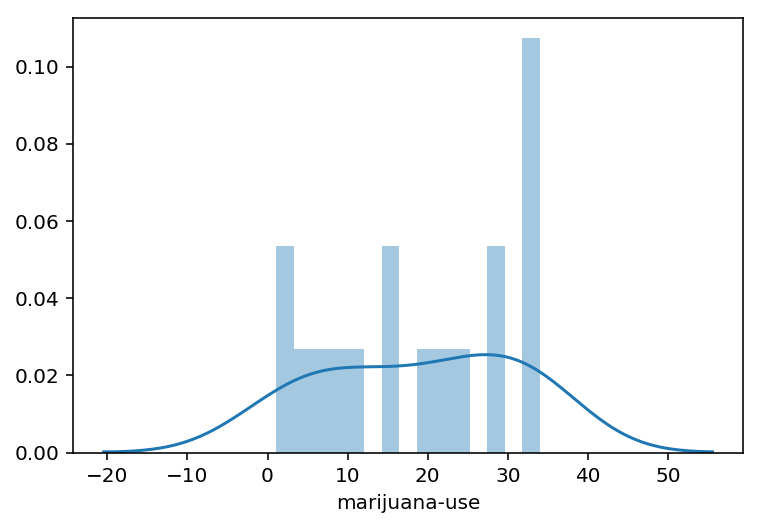

In [130]:
sns.distplot(drug_use_pd['marijuana-use'], bins=15)


In [131]:
drug_use_pd_sorted = sorted(drug_use_pd['marijuana-use'])


In [132]:
drug_use_pd['Percentile Marijuana Use'] = drug_use_pd['marijuana-use'].apply(lambda x: stats.percentileofscore(drug_use_pd_sorted, x))

In [133]:
drug_use_pd['Percentile Marijuana Use']

0       5.882353
1      17.647059
2      29.411765
3      41.176471
4      58.823529
5      70.588235
6      94.117647
7      88.235294
8     100.000000
9      82.352941
10     76.470588
11     64.705882
12     52.941176
13     47.058824
14     35.294118
15     23.529412
16     11.764706
Name: Percentile Marijuana Use, dtype: float64

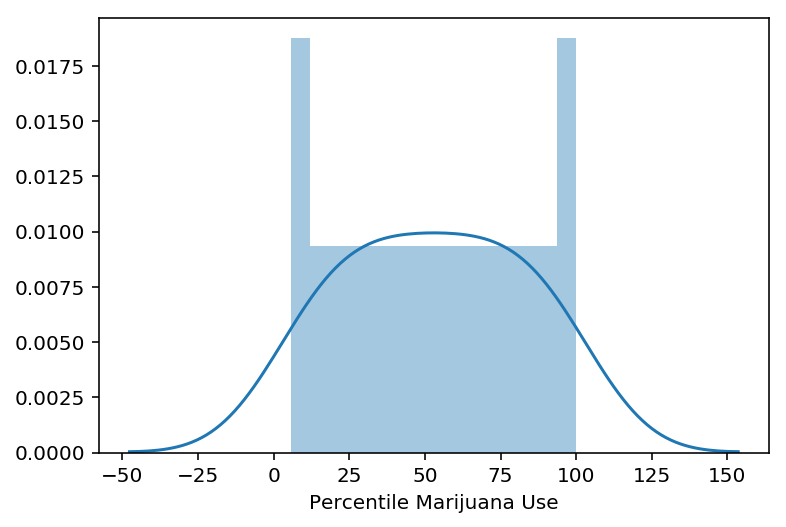

In [134]:
sns.distplot(drug_use_pd['Percentile Marijuana Use'], bins = 15)

In [ ]:
# Plotting the percentile provides visually more normal.